ASSIGNMENT 1: Exploring and Visualizing Data

MSDS 422 - SEC 57 THURSDAY

FERDYNAND HEBAL - 6/30/2019

# Exposition, problem description, and management recommendations

Based on the descriptive analysis and models explored, it is clear that there is a growing interest in the cs and development side of analytics. There seems to be an professional and industry importance and personal desire for for python skills and great deal of intest in the new course offering especially the analytic application development,  foundations in engineering, and python courses for newer student and student who have many courses left to complete before graduation. R does has a base of interest and some interest in javascript is percolating among newcomers, but it in general it seems  that the development side of analytics, e.g. python, application development, and data engineering are of great interest.

Planning to allocate resources to these new courses and perhaps hiring of talent with the skillset to teach the in demand skills would be a prudent goal if these trends continue.

R will need to be supported because of the considerable interest and preference among students, but python seems to be the main interest and all course offerings should support python. Although SAS has a following it does not seem to be a major need. Javascript might be somethign to consider in the future as interest grows. Perhaps javascript electives in analytic web development and data visualization could be offered. Java is not a primary interest to our students

Below I have outlined descriptive statistics, visualizations and comments describing each figure. I examine the effects of two transformations (min-max scaling and standardization), and develop models to help illustrate the relationship between the number of courses left to complete the program and programming preferences reported in the survey. The number of courses serves as a proxy for what needs may be expected from new student and students who have many courses left to complete vs students who are close to finishing.

Of the predictive models, RandomForestRegressor offers some insight indicating the relative importance of each attribute for making accurate predictions of the number of courses left to complete. Here, the professional need and personal desire for python skills top the list along with the great interest in the new analytic application development, the foundations in engineering, and python courses.

# Data preparation, exploration, visualization 

In [1]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import seaborn as sns  # pretty plotting, including heat map

In [2]:
# read in comma-delimited text file, creating a pandas DataFrame object
# note that IPAddress is formatted as an actual IP address
# but is actually a random-hash of the original IP address
valid_survey_input = pd.read_csv('mspa-survey-data.csv')

# use the RespondentID as label for the rows... the index of DataFrame
valid_survey_input.set_index('RespondentID', drop = True, inplace = True)

# examine the structure of the DataFrame object
print('\nContents of initial survey data ---------------')

# could use len() or first index of shape() to get number of rows/observations
print('\nNumber of Respondents =', len(valid_survey_input)) 



Contents of initial survey data ---------------

Number of Respondents = 207


In [83]:
# abbreviated printing of the first five rows of the data frame
#pd.DataFrame.head(valid_survey_input)

In [82]:
# show the column/variable names of the DataFrame
# note that RespondentID is no longer present
#valid_survey_input.info()

/Users/ferdynandhebal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Unscaled')

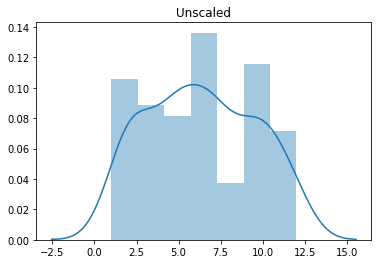

In [5]:
# ----------------------------------------------------------
# transformations & feature scaling
# ----------------------------------------------------------
# One of the most important transformations is feature scaling. 
# Many Machine Learning algorithms don’t perform well when numerical inputs have very different scales. 
# In other cases, e.g. linear regression, assumptions like normality of the data are made
# Failing to confirm the validity of our assumptions can make our models meaningless
from sklearn.preprocessing import MinMaxScaler
#Min-max scaling rescales values to a range from 0 to 1. 
#This is accomplished by subtracting the min value and dividing by 
# the differenece between teh max and the min. 
from sklearn.preprocessing import StandardScaler
#Standardization is quite different subtracts the mean value and then it divides by 
#the standard deviation so that the resulting distribution as unit variance. 
#Unlike min-max scaling, standardization does not bound values 
#to a specific range, which may be a problem for some algorithms 
#(e.g., neural networks often expect an input value ranging from 0 to 1). 
#However, standardization is much less affected by outliers.

X = np.array(valid_survey_input['Courses_Completed'].dropna()).reshape(-1,1)

unscaled_fig, ax = plt.subplots()
sns.distplot(X).set_title('Unscaled')

/Users/ferdynandhebal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'StandardScaler')

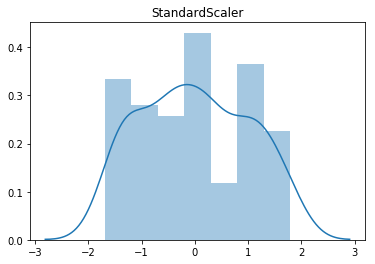

In [6]:
standard_fig, ax = plt.subplots()
sns.distplot(StandardScaler().fit_transform(X)).set_title('StandardScaler')

#Below can be seen the same distribution rescaled between -3 and +3 Standard deviations from the mean (0)

/Users/ferdynandhebal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'MinMaxScaler')

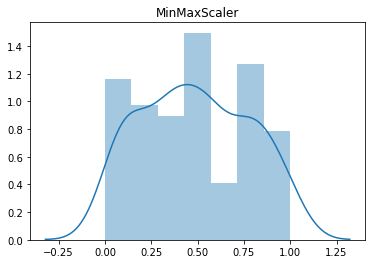

In [7]:
minmax_fig, ax = plt.subplots()
sns.distplot(MinMaxScaler().fit_transform(X)).set_title('MinMaxScaler')

#Below can be seen the same distribution rescaled to a 0 to 1 range. Several can be seen below 0 in fact.

Text(0.5, 1.0, 'NaturalLog')

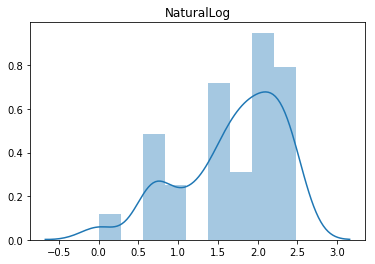

In [8]:
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
#Natural log transformation is one of several (e.g. sqroot etc...)
#that can be used to help achieve a more "normal" data set
#given that some models and conditions assume normality

In [9]:
valid_survey_input.describe()

,Personal_JavaScalaSpark,Personal_JavaScriptHTMLCSS,Personal_Python,Personal_R,Personal_SAS,Professional_JavaScalaSpark,Professional_JavaScriptHTMLCSS,Professional_Python,Professional_R,Professional_SAS,Industry_JavaScalaSpark,Industry_JavaScriptHTMLCSS,Industry_Python,Industry_R,Industry_SAS,Python_Course_Interest,Foundations_DE_Course_Interest,Analytics_App_Course_Interest,Systems_Analysis_Course_Interest,Courses_Completed
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,206.000000,200.000000,203.000000,200.000000,187.000000
mean,10.135266,4.797101,31.304348,37.125604,16.637681,9.251208,5.840580,30.028986,36.415459,18.463768,11.942029,6.966184,29.772947,32.434783,18.884058,73.529126,58.045000,55.201970,53.630000,6.342246
std,11.383477,6.757764,15.570982,14.576003,13.626400,13.167505,10.812555,19.144802,20.847606,18.831841,14.706399,10.030721,17.959816,15.912209,19.137623,29.835429,32.588079,34.147954,33.539493,3.170849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,20.000000,30.000000,5.000000,0.000000,0.000000,20.000000,25.000000,0.000000,0.000000,0.000000,20.000000,22.500000,0.000000,53.000000,29.500000,25.000000,21.500000,4.000000
50%,9.000000,0.000000,30.000000,35.000000,15.000000,5.000000,0.000000,30.000000,33.000000,15.000000,5.000000,0.000000,30.000000,30.000000,15.000000,82.500000,60.000000,60.000000,51.500000,6.000000
75%,20.000000,10.000000,40.000000,50.000000,25.000000,15.000000,10.000000,40.000000,50.000000,30.000000,20.000000,10.000000,40.000000,40.000000,30.000000,100.000000,89.250000,85.000000,80.250000,9.000000
max,70.000000,30.000000,90.000000,100.000000,75.000000,80.000000,100.000000,100.000000,100.000000,100.000000,70.000000,50.000000,95.000000,85.000000,100.000000,100.000000,100.000000,100.000000,100.000000,12.000000


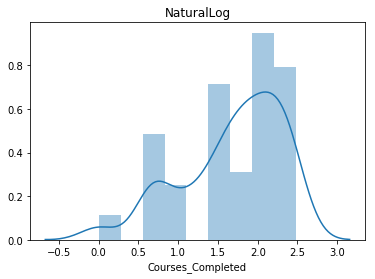

Log Transformation
-0.11631594744672658
-0.8256490136322748
No Transformation
-1.0934377328139786
0.09273123229607173


In [10]:
X = valid_survey_input['Courses_Completed'].dropna()
log_fig, ax = plt.subplots()
sns.distplot(np.log(X)).set_title('NaturalLog')
plt.show()
from scipy.stats import kurtosis, skew

print('Log Transformation')
print(kurtosis(np.log(X)))
print(skew(np.log(X)))

from scipy.stats import kurtosis, skew
print('No Transformation')
print(kurtosis(X))
print(skew(X))

#It is clear that the log transformation did improve kurotosis (e.g. closer to 0)
#however skewness seems to have worsened. It is unclear if this improves validity of
# of this data in a model where normality is assumed.

In [50]:
# shorten the variable/column names for software preference variables
survey_df = valid_survey_input.rename(index=str, columns={
    'Personal_JavaScalaSpark': 'My_Java',
    'Personal_JavaScriptHTMLCSS': 'My_JS',
    'Personal_Python': 'My_Python',
    'Personal_R': 'My_R',
    'Personal_SAS': 'My_SAS',
    'Professional_JavaScalaSpark': 'Prof_Java',
    'Professional_JavaScriptHTMLCSS': 'Prof_JS',
    'Professional_Python': 'Prof_Python',
    'Professional_R': 'Prof_R',
    'Professional_SAS': 'Prof_SAS',
    'Industry_JavaScalaSpark': 'Ind_Java',
    'Industry_JavaScriptHTMLCSS': 'Ind_JS',
    'Industry_Python': 'Ind_Python',
    'Industry_R': 'Ind_R',
    'Industry_SAS': 'Ind_SAS'})

# define subset DataFrame for analysis of software preferences 
software_df = survey_df.loc[:, 'My_Java':'Ind_SAS']


Reviewing the histograms below, it may be interpreted that there is a substantial interest the Analytics application, Foundations in Data engineering, Python, and the Systems analysis courses. The Python course however has clearly the most high end scores. 

Regarding industry importance, professional need, and personal desire:
Scores are distributed relatively evenly distrubuted, although more heavily in Python and R, and less so in Java and Javascript, and SAS

In [51]:
survey_df["Courses_Left"] = 12-survey_df["Courses_Completed"]

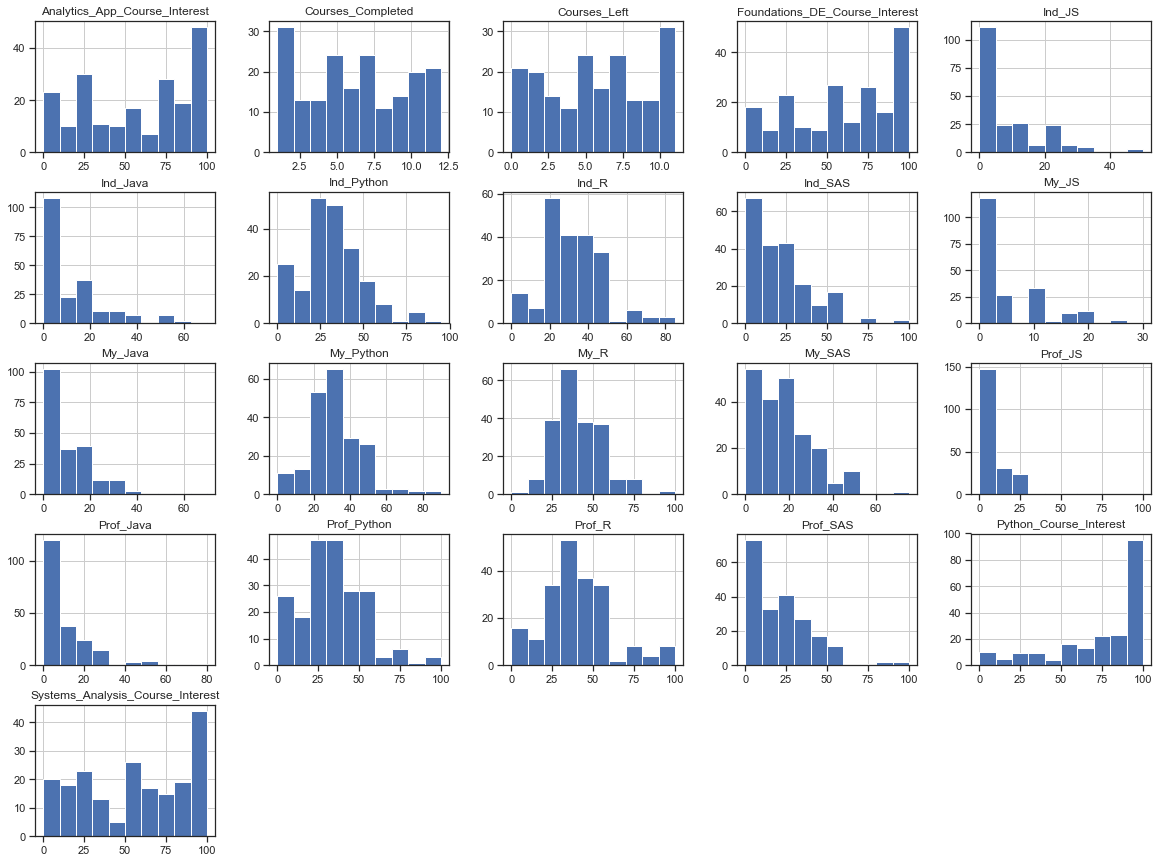

In [52]:
%matplotlib inline   
import matplotlib.pyplot as plt
survey_df.hist(bins=10, figsize=(20,15))
plt.show()

Reviewing the boxplots below. 

It is clear that there is a good deal of interest in the new course offerings, and even cleare here there rank order.

Regarding the language preferences, it seems R inches ahead of python, with far less interest in java, js, and SAS


Reviewing the scatterplots below, it is difficult to see much meaningful correlation though there seems to be an inverse relationship between interest in R vs languages like Python, Javascript, and Java. Perhaps because R is more of a statistical based language than one used for general purpose programming and web development. SAS does not seem to correlate positively with anything, and javascript may be of more interest to new student, i.e. those with more course left to complete.

/Users/ferdynandhebal/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/ferdynandhebal/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/ferdynandhebal/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


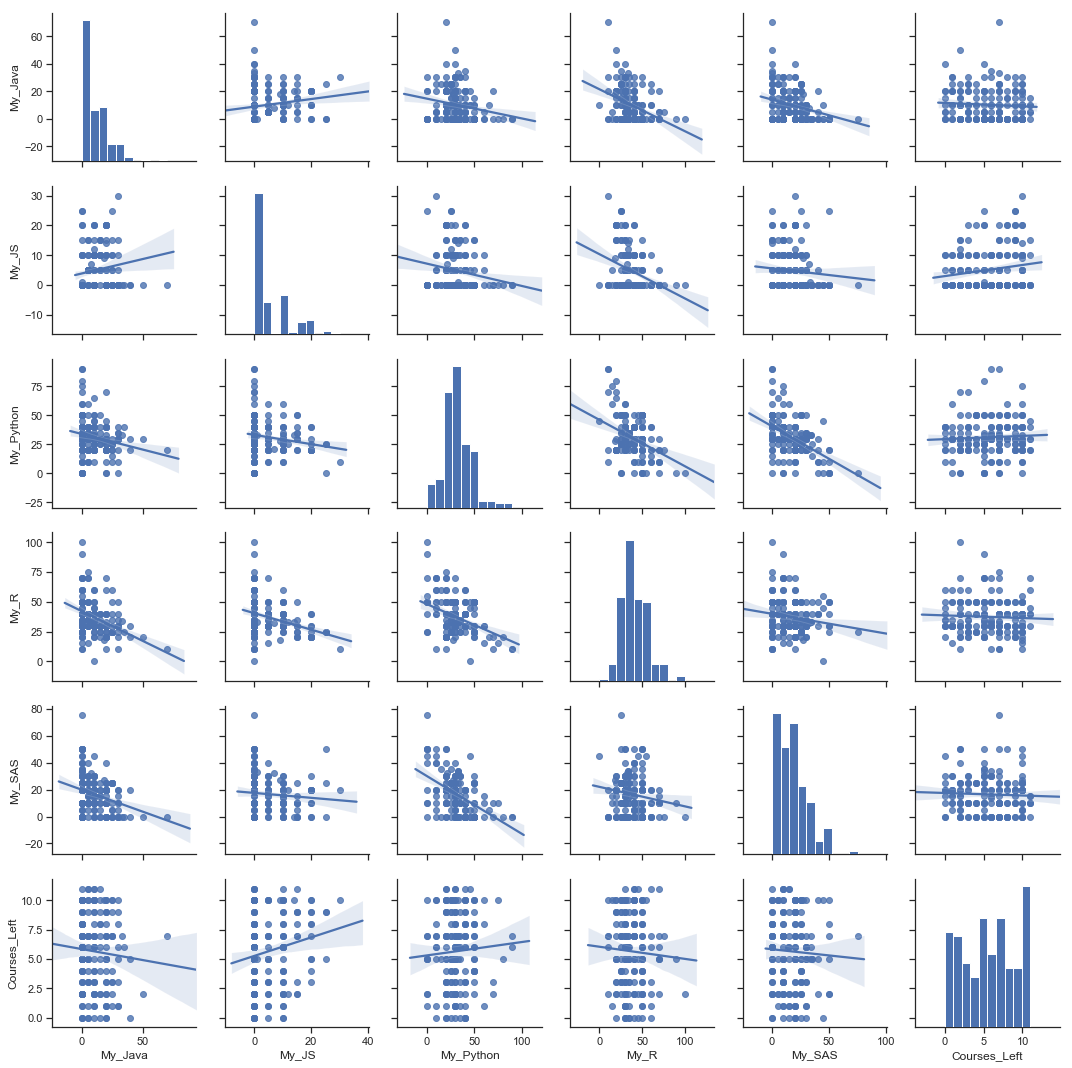

In [53]:
#survey_df['Just_Starting']  = survey_df['Courses_Completed'] <=1 & survey_df['Courses_Completed'].notnull()

import seaborn as sns
sns.set(style="ticks")
sns.pairplot(survey_df.loc[:,'My_Java':'My_SAS'].join(survey_df['Courses_Left']), kind="reg")
plt.show()

Reviewing the Descriptive statitics below sorted by mean it is clear that the most desired programming languages are python and R. R in this case is still outpacing python but I think python is a future interest and may handily take over R considering python's versatility and the growing interest in programming fundamentals, and these new course offerings.

In [60]:
# descriptive statistics for software preference variables
print('\nDescriptive statistics for survey data ---------------')
survey_df.describe().T.sort_values(by='mean', ascending=False)


Descriptive statistics for survey data ---------------


,count,mean,std,min,25%,50%,75%,max
Python_Course_Interest,206.0,73.529126,29.835429,0.0,53.0,82.5,100.00,100.0
Foundations_DE_Course_Interest,200.0,58.045000,32.588079,0.0,29.5,60.0,89.25,100.0
Analytics_App_Course_Interest,203.0,55.201970,34.147954,0.0,25.0,60.0,85.00,100.0
Systems_Analysis_Course_Interest,200.0,53.630000,33.539493,0.0,21.5,51.5,80.25,100.0
My_R,207.0,37.125604,14.576003,0.0,30.0,35.0,50.00,100.0
Prof_R,207.0,36.415459,20.847606,0.0,25.0,33.0,50.00,100.0
Ind_R,207.0,32.434783,15.912209,0.0,22.5,30.0,40.00,85.0
My_Python,207.0,31.304348,15.570982,0.0,20.0,30.0,40.00,90.0
Prof_Python,207.0,30.028986,19.144802,0.0,20.0,30.0,40.00,100.0
Ind_Python,207.0,29.772947,17.959816,0.0,20.0,30.0,40.00,95.0


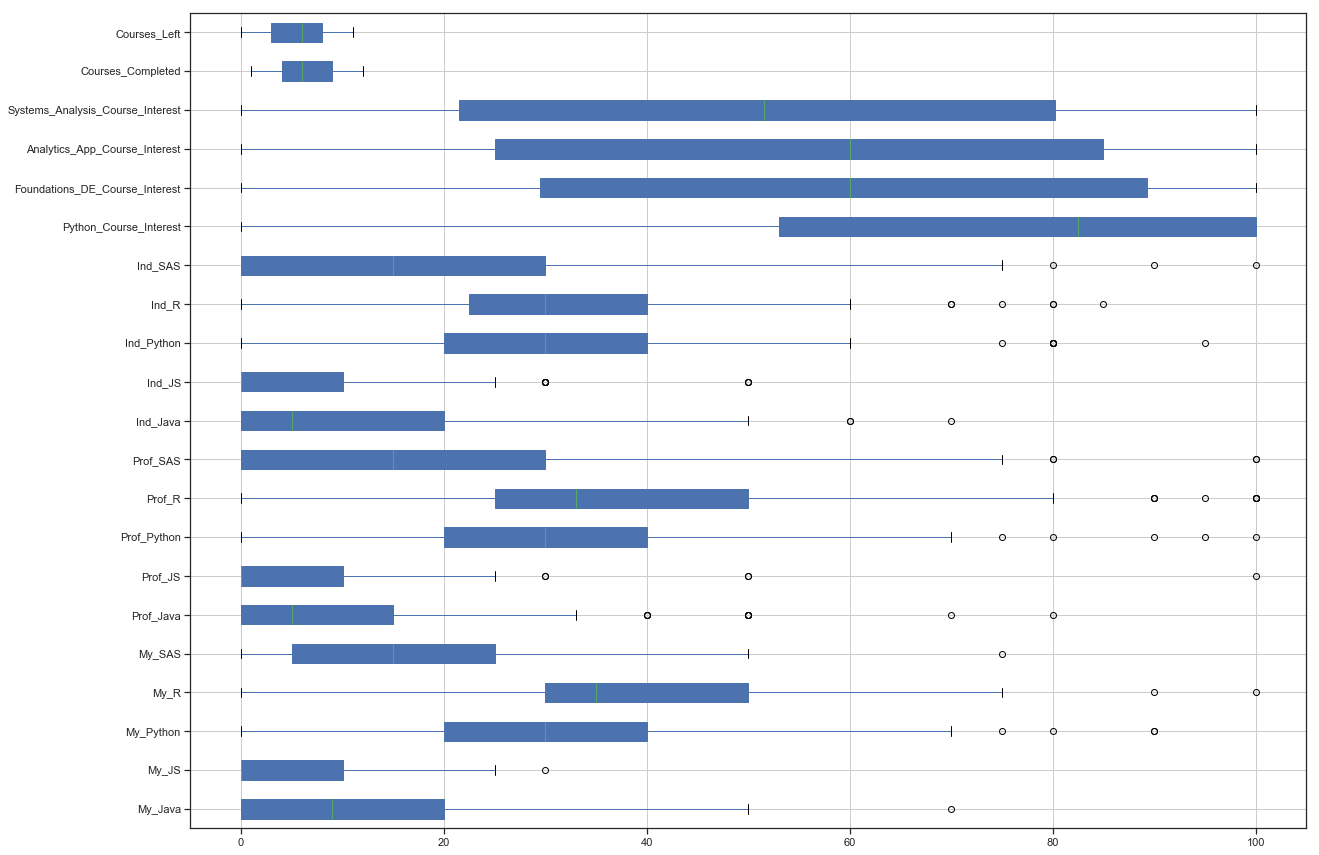

In [61]:
%matplotlib inline
boxplot = survey_df.boxplot(vert=False, figsize=(20,15),patch_artist=True)

The correlation visual below shows similar results to the scatterplot and boxplots above, but of interest to my analyis is the last row denoting courses left to complete the program.

Though none of the correlations are very strong, the strongest ar javascript, python, and the analytics application development course, perhaps signaling an influx of students with a interest in the cs and development side of data science, more than the traditional statistical focuses.

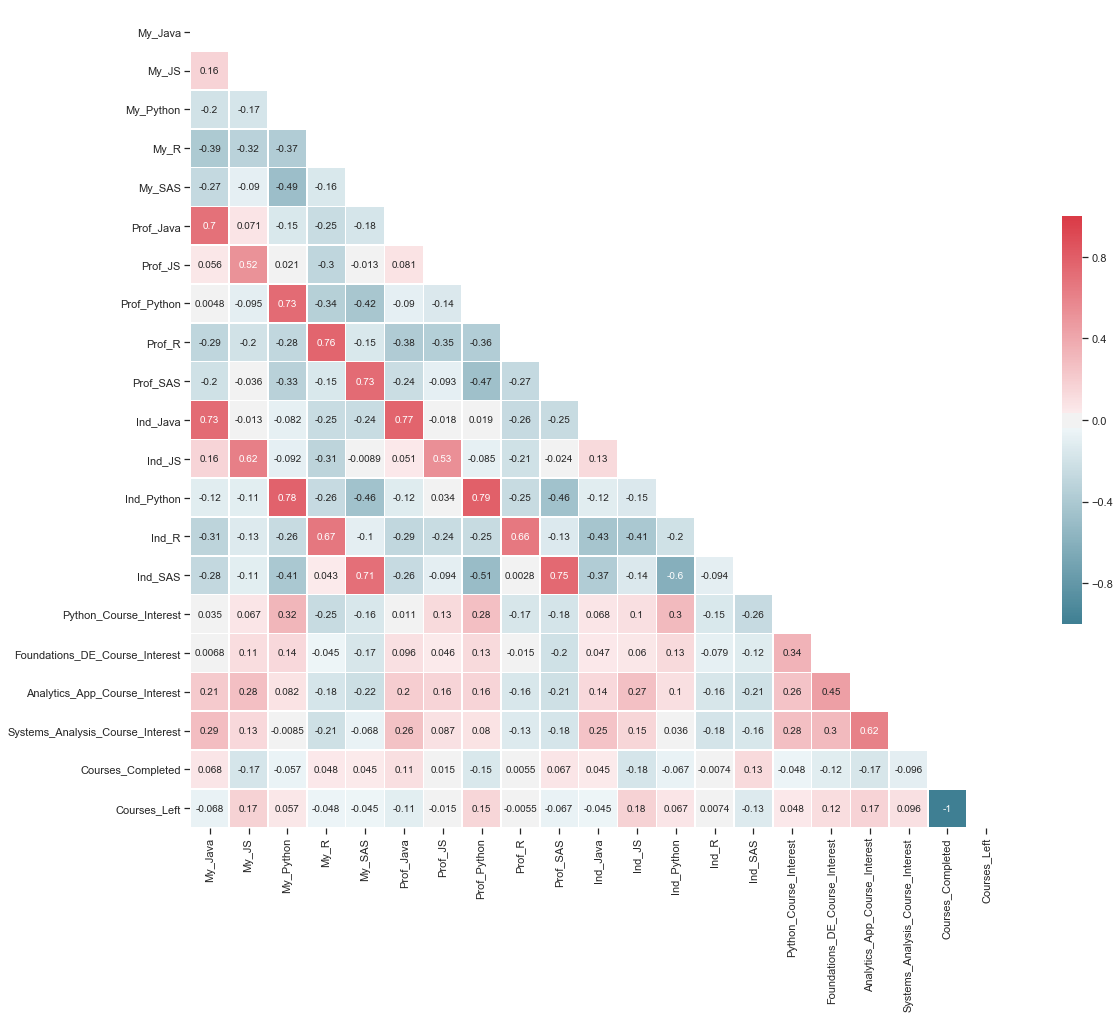

In [62]:
corr = survey_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20,15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.show()

In [63]:
corr.loc["Courses_Left"].round(3).sort_values(ascending=False)

Courses_Left                        1.000
Ind_JS                              0.178
My_JS                               0.173
Analytics_App_Course_Interest       0.166
Prof_Python                         0.150
Foundations_DE_Course_Interest      0.116
Systems_Analysis_Course_Interest    0.096
Ind_Python                          0.067
My_Python                           0.057
Python_Course_Interest              0.048
Ind_R                               0.007
Prof_R                             -0.005
Prof_JS                            -0.015
My_SAS                             -0.045
Ind_Java                           -0.045
My_R                               -0.048
Prof_SAS                           -0.067
My_Java                            -0.068
Prof_Java                          -0.106
Ind_SAS                            -0.128
Courses_Completed                  -1.000
Name: Courses_Left, dtype: float64

# Implementation and programming 

In [65]:
from sklearn.impute import SimpleImputer
survey_num = survey_df.loc[:,:'Systems_Analysis_Course_Interest'].join(survey_df['Courses_Left']).dropna()
#imputer.fit(survey_num)
#imputer.statistics_

In [66]:
survey = survey_num.drop('Courses_Left', axis=1)
survey_labels = survey_num['Courses_Left'].copy()

# Review research design and modeling methods

In [67]:
from scipy import sparse
#survey.info()
survey_cat = survey_df.loc[:,"PREDICT400":"PREDICT457"]
survey_cat = survey_cat.notnull().astype(np.int)
dense_matrix = np.array(survey_cat)
sparse.csr_matrix(survey_cat.values)

survey_df.loc[:,"PREDICT400":"PREDICT457"] = survey_df.loc[:,"PREDICT400":"PREDICT457"].notnull().astype(np.int)

In [81]:
survey = survey_df[list(survey_num)]
survey = survey.dropna()
#survey.info()
#survey = survey[~survey['Courses_Completed'].isna()]
survey_labels = survey['Courses_Left'].copy()
survey = survey.drop('Courses_Left', axis=1)
#survey.info()

In [69]:
#numeric tranformations
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(survey)[:-1]
#cat_attribs = ['Graduate_Date']
#cat_attribs = list(survey_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        #("cat", OneHotEncoder(), cat_attribs),     
    ])
   # ,remainder = 'passthrough')

survey_prepared = full_pipeline.fit_transform(survey)

In [71]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(survey_prepared, survey_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [72]:
from sklearn.metrics import mean_squared_error
survey_predictions = lin_reg.predict(survey_prepared)
lin_mse = mean_squared_error(survey_labels, survey_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.9364934165117758

# Review results, evaluate models

In [75]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, survey_prepared, survey_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(tree_rmse_scores)

Scores: [3.51978535 4.98887652 3.62092683 5.09901951 5.48356129 4.65474668
 4.29774223 3.74950977 4.43250029 5.08747019]
Mean: 4.493413865825077
Standard deviation: 0.6539221538930416


In [76]:
lin_scores = cross_val_score(lin_reg, survey_prepared, survey_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [2.65912774 2.85440687 2.3721331  3.90362127 3.79124353 2.97269623
 3.00625826 3.24648878 2.41676956 4.02551047]
Mean: 3.124825582364194
Standard deviation: 0.571993219095514


In [77]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(survey_prepared, survey_labels)

forest_scores = cross_val_score(forest_reg, survey_prepared, survey_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [3.51978535 4.98887652 3.62092683 5.09901951 5.48356129 4.65474668
 4.29774223 3.74950977 4.43250029 5.08747019]
Mean: 4.493413865825077
Standard deviation: 0.6539221538930416


/Users/ferdynandhebal/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [78]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(survey_prepared, survey_labels)
grid_search.best_estimator_
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

/Users/ferdynandhebal/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0.04861858, 0.04218334, 0.07120799, 0.04696591, 0.04346743,
       0.02006609, 0.03814843, 0.07426643, 0.04529291, 0.0565101 ,
       0.04326254, 0.04322959, 0.05470536, 0.05369642, 0.06094528,
       0.06998941, 0.1035379 , 0.08390629])

Although none of the models above perform exceedingly well, or offer a great deal of insight. the RandomForestRegressor offers some insight indicating the relative importance of each attribute for making accurate predictions of the number of courses left to complete. Here professional need and personal desire for python skills top the list, a great intest in analytic application developmnet, the foundations in engineering, and python courses. Where as javascript bottoms out. It seems that javscript may not a main player in the interests of new and current students with many courses left to complete. But it does seems to confirm that the development side of analytics, e.g. python, application development, and foundations of engineering are of great interest.

In [79]:
#extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = full_pipeline.named_transformers_["num"]
#cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs #+ cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.10353789568608444, 'Foundations_DE_Course_Interest'),
 (0.08390629380127583, 'Analytics_App_Course_Interest'),
 (0.07426643337774681, 'Prof_Python'),
 (0.07120799378008776, 'My_Python'),
 (0.06998940658783886, 'Python_Course_Interest'),
 (0.060945275679259274, 'Ind_SAS'),
 (0.05651010053484984, 'Prof_SAS'),
 (0.05470535983862934, 'Ind_Python'),
 (0.053696417050637005, 'Ind_R'),
 (0.0486185829972663, 'My_Java'),
 (0.046965906879019276, 'My_R'),
 (0.04529290774195116, 'Prof_R'),
 (0.043467432924414136, 'My_SAS'),
 (0.04326253802886924, 'Ind_Java'),
 (0.04322959187757972, 'Ind_JS'),
 (0.04218333972213544, 'My_JS'),
 (0.03814843044349268, 'Prof_JS'),
 (0.020066093048862785, 'Prof_Java')]